# Leukocytes - Data preparation and partitioning

### Load the dataset and verify that each leukocyte class (lymphocyte, neutrophil, eosinophil, basophil, monocyte) contains exactly 500 images

In [ ]:
!pip install -U fastai

from fastai.vision.all import *
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_root = Path('/content/drive/MyDrive/CVData/dataset_leukocytes')
folders = os.listdir(data_root)
folders

['eosinophil', 'basophil', 'neutrophil', 'lymphocyte', 'monocyte']

In [ ]:
# collect images into a DataFrame
img_files = get_image_files(data_root)

df = pd.DataFrame({
    'filepath': [str(f) for f in img_files],
    'label': [f.parent.name for f in img_files]
})

df.head()

,filepath,label
0,/content/drive/MyDrive/CVData/dataset_leukocytes/eosinophil/EO_31926.jpg,eosinophil
1,/content/drive/MyDrive/CVData/dataset_leukocytes/eosinophil/EO_499786.jpg,eosinophil
2,/content/drive/MyDrive/CVData/dataset_leukocytes/eosinophil/EO_708.jpg,eosinophil
3,/content/drive/MyDrive/CVData/dataset_leukocytes/eosinophil/EO_41114.jpg,eosinophil
4,/content/drive/MyDrive/CVData/dataset_leukocytes/eosinophil/EO_46356.jpg,eosinophil


In [ ]:
class_counts = df['label'].value_counts()
print(class_counts)

label
eosinophil    500
basophil      500
neutrophil    500
lymphocyte    500
monocyte      500
Name: count, dtype: int64


Each leukocyte class contains exactly 500 images. In the next block three samples of each class are displayed.

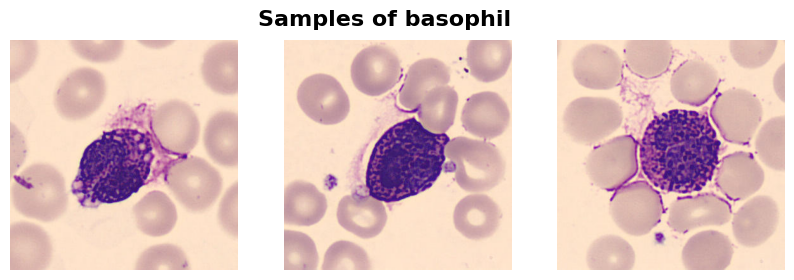

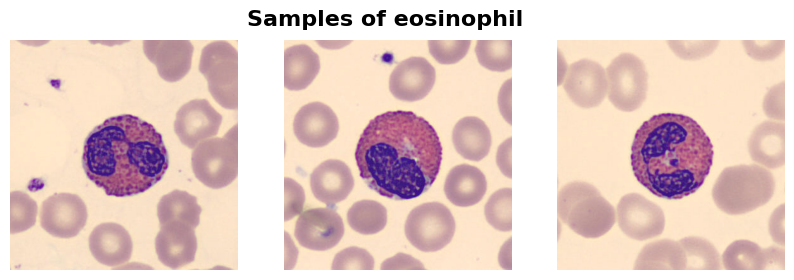

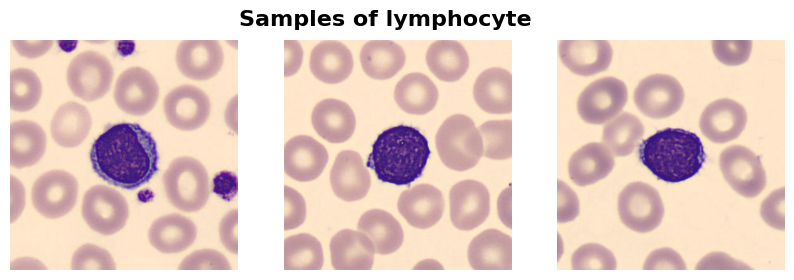

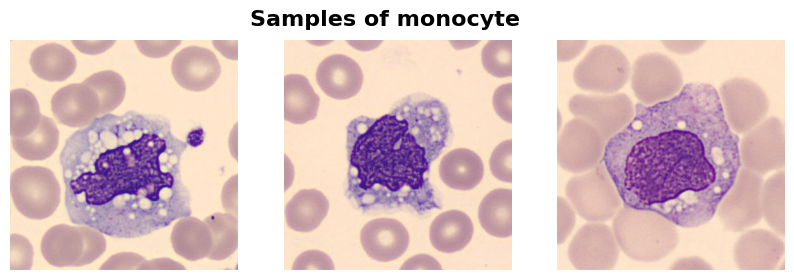

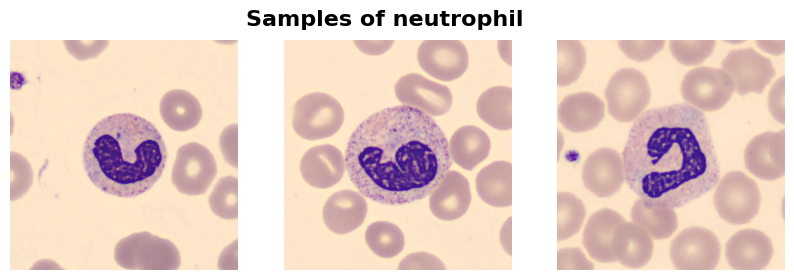

In [ ]:
import matplotlib.pyplot as plt

classes = sorted(df['label'].unique())

for label in classes:
    sample_paths = df[df['label'] == label]['filepath'].sample(3, random_state=42)

    # Create a row of 3 images
    fig, axes = plt.subplots(1, 3, figsize=(10, 3))
    fig.suptitle(f"Samples of {label}", fontsize=16, weight='bold')

    for ax, img_path in zip(axes, sample_paths):
        img = PILImage.create(img_path)
        ax.imshow(img)
        ax.axis('off')

    plt.show()

### Create a partition into training, validation, and test subsets

In [ ]:
# Split 70/15/15
RANDOM_STATE = 42

# Train 70% + temp 30%
df_train, df_temp = train_test_split(
    df,
    test_size=0.30,
    stratify=df['label'],
    random_state=RANDOM_STATE
)

# Validation 15% + Test 15%
df_val, df_test = train_test_split(
    df_temp,
    test_size=0.50,
    stratify=df_temp['label'],
    random_state=RANDOM_STATE
)

print(f"Training set: {len(df_train)}")
print(f"Validation set: {len(df_val)}")
print(f"Test set: {len(df_test)}")

Training set: 1750
Validation set: 375
Test set: 375


In [ ]:
df_train['set'] = 'train'
df_val['set'] = 'valid'
df_test['set'] = 'test'

full_df = pd.concat([df_train, df_val, df_test], ignore_index=True)

full_df.head()

,filepath,label,set
0,/content/drive/MyDrive/CVData/dataset_leukocytes/neutrophil/BNE_240705.jpg,neutrophil,train
1,/content/drive/MyDrive/CVData/dataset_leukocytes/monocyte/MO_12336.jpg,monocyte,train
2,/content/drive/MyDrive/CVData/dataset_leukocytes/eosinophil/EO_152760.jpg,eosinophil,train
3,/content/drive/MyDrive/CVData/dataset_leukocytes/monocyte/MO_967515.jpg,monocyte,train
4,/content/drive/MyDrive/CVData/dataset_leukocytes/eosinophil/EO_6489.jpg,eosinophil,train


In [ ]:
full_df.groupby(['label', 'set']).size().unstack(fill_value=0)

set,test,train,valid
label,,,
basophil,75,350,75
eosinophil,75,350,75
lymphocyte,75,350,75
monocyte,75,350,75
neutrophil,75,350,75


In [ ]:
df_test.head()

,filepath,label,set
341,/content/drive/MyDrive/CVData/dataset_leukocytes/eosinophil/EO_164571.jpg,eosinophil,test
549,/content/drive/MyDrive/CVData/dataset_leukocytes/basophil/BA_915476.jpg,basophil,test
8,/content/drive/MyDrive/CVData/dataset_leukocytes/eosinophil/EO_510096.jpg,eosinophil,test
257,/content/drive/MyDrive/CVData/dataset_leukocytes/eosinophil/EO_7698.jpg,eosinophil,test
1672,/content/drive/MyDrive/CVData/dataset_leukocytes/lymphocyte/LY_154914.jpg,lymphocyte,test


In [ ]:
# Count occurrences for each label in the test sets
df_test.groupby(['label', 'set']).size().unstack(fill_value=0)

set,test
label,
basophil,75
eosinophil,75
lymphocyte,75
monocyte,75
neutrophil,75


### Save the resulting dataframe so that all later experiments use the same division.


In [ ]:
from pathlib import Path

# Choose a folder for saving the dataframe
df_path = Path('/content/drive/MyDrive/ColabNotebooks/dataframes/')
df_path.mkdir(parents=True, exist_ok=True)

# Define the file name
csv_file = df_path / 'leukocytes_splits.csv'

# Save the dataframe (full_df is the dataframe from Notebook 1)
full_df.to_csv(csv_file, index=False)

print(f"Dataframe saved successfully at: {csv_file}")

Dataframe saved successfully at: /content/drive/MyDrive/ColabNotebooks/dataframes/leukocytes_splits.csv


This first notebook focuses exclusively on dataset exploration, preparation, and saving
the split information, without training any model yet.